In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

In [125]:
covid = pd.read_csv('covid.csv', parse_dates=['date'], dayfirst=True)

C:\Users\Maira\AppData\Local\Temp\ipykernel_6548\2510529966.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  covid = pd.read_csv('covid.csv', parse_dates=['date'], dayfirst=True)


In [7]:
covid.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


In [121]:
covid['location'].value_counts()

location
Sweden            146
Canada            146
United States     146
Lithuania         146
Brazil            146
                 ... 
Yemen              45
Western Sahara     29
Tajikistan         24
Comoros            23
Lesotho            10
Name: count, Length: 212, dtype: int64

In [17]:
covid.shape

(19496, 32)

In [127]:
covid = covid[['date','location','population','total_cases','total_deaths','stringency_index','median_age']]
covid.head(10)

,date,location,population,total_cases,total_deaths,stringency_index,median_age
0,2020-03-13,Aruba,106766.0,2,0,0.00,41.2
1,2020-03-20,Aruba,106766.0,4,0,30.56,41.2
2,2020-03-24,Aruba,106766.0,12,0,44.84,41.2
3,2020-03-25,Aruba,106766.0,17,0,44.84,41.2
4,2020-03-26,Aruba,106766.0,19,0,44.84,41.2
5,2020-03-27,Aruba,106766.0,28,0,44.84,41.2
6,2020-03-28,Aruba,106766.0,28,0,44.84,41.2
7,2020-03-29,Aruba,106766.0,28,0,83.46,41.2
8,2020-03-30,Aruba,106766.0,50,0,83.46,41.2
9,2020-04-01,Aruba,106766.0,55,0,83.46,41.2


In [129]:
covid.sample(10)

,date,location,population,total_cases,total_deaths,stringency_index,median_age
16253,2020-04-19,San Marino,33938.0,455,39,94.71,NaN
6918,2020-04-27,Gibraltar,33691.0,141,0,NaN,NaN
9244,2020-05-18,Israel,8655541.0,16617,272,NaN,30.6
15260,2020-05-05,Qatar,2881060.0,16191,12,90.74,31.9
18932,2020-03-17,Kosovo,1932774.0,2,0,86.38,NaN
4474,2020-01-06,Germany,83783945.0,0,0,0.00,46.6
267,2020-03-31,Anguilla,15002.0,2,0,NaN,NaN
15648,2020-03-13,Saudi Arabia,34813867.0,62,0,41.27,31.9
15344,2020-03-06,Romania,19237682.0,6,0,20.64,43.0
7409,2020-05-10,Grenada,112519.0,21,0,NaN,29.4


In [131]:
covid.iloc[1002:10002]

,date,location,population,total_cases,total_deaths,stringency_index,median_age
1002,2020-04-18,Australia,25499881.0,6533,67,68.26,37.9
1003,2020-04-19,Australia,25499881.0,6586,69,68.26,37.9
1004,2020-04-20,Australia,25499881.0,6612,70,68.26,37.9
1005,2020-04-21,Australia,25499881.0,6625,71,68.26,37.9
1006,2020-04-22,Australia,25499881.0,6647,74,68.26,37.9
...,...,...,...,...,...,...,...
9997,2020-01-22,Cambodia,16718971.0,0,0,NaN,25.6
9998,2020-01-23,Cambodia,16718971.0,0,0,NaN,25.6
9999,2020-01-24,Cambodia,16718971.0,0,0,NaN,25.6
10000,2020-01-25,Cambodia,16718971.0,0,0,NaN,25.6


In [133]:
#getting data using random date
random_date = covid[covid.date=='2020-04-23']
random_date.sample(10)

,date,location,population,total_cases,total_deaths,stringency_index,median_age
31,2020-04-23,Aruba,1.067660e+05,100,2,83.46,41.2
7458,2020-04-23,Greenland,5.677200e+04,11,0,82.93,NaN
7183,2020-04-23,Equatorial Guinea,1.402985e+06,83,0,NaN,22.4
17145,2020-04-23,Syria,1.750066e+07,42,3,80.43,21.7
13720,2020-04-23,Norway,5.421242e+06,7250,169,69.04,39.7
19400,2020-04-23,World,7.794799e+09,2583279,186201,NaN,30.9
17272,2020-04-23,Chad,1.642586e+07,34,0,88.23,16.7
11340,2020-04-23,Luxembourg,6.259760e+05,3654,80,75.66,39.7
2339,2020-04-23,Belize,3.976210e+05,18,2,64.68,25.0
18360,2020-04-23,United States,3.310026e+08,842629,46784,68.41,38.3


In [135]:
random_date.shape

(207, 7)

In [137]:
#sorting data using maximum deaths on the random date
max_deaths = random_date.sort_values(by='total_deaths',ascending=False)
max_deaths.head(10)

,date,location,population,total_cases,total_deaths,stringency_index,median_age
19400,2020-04-23,World,7.794799e+09,2583279,186201,NaN,30.9
18360,2020-04-23,United States,3.310026e+08,842629,46784,68.41,38.3
9365,2020-04-23,Italy,6.046183e+07,187327,25085,94.58,47.9
5658,2020-04-23,Spain,4.675478e+07,203649,22157,89.41,45.5
6284,2020-04-23,France,6.527351e+07,119151,21340,89.41,42.0
6568,2020-04-23,United Kingdom,6.788600e+07,133495,21060,79.63,40.8
1492,2020-04-23,Belgium,1.158962e+07,41889,6262,83.60,41.8
8783,2020-04-23,Iran,8.399295e+07,85996,5391,61.51,32.4
4582,2020-04-23,Germany,8.378394e+07,148046,5094,74.61,46.6
3482,2020-04-23,China,1.439324e+09,83876,4636,55.17,38.7


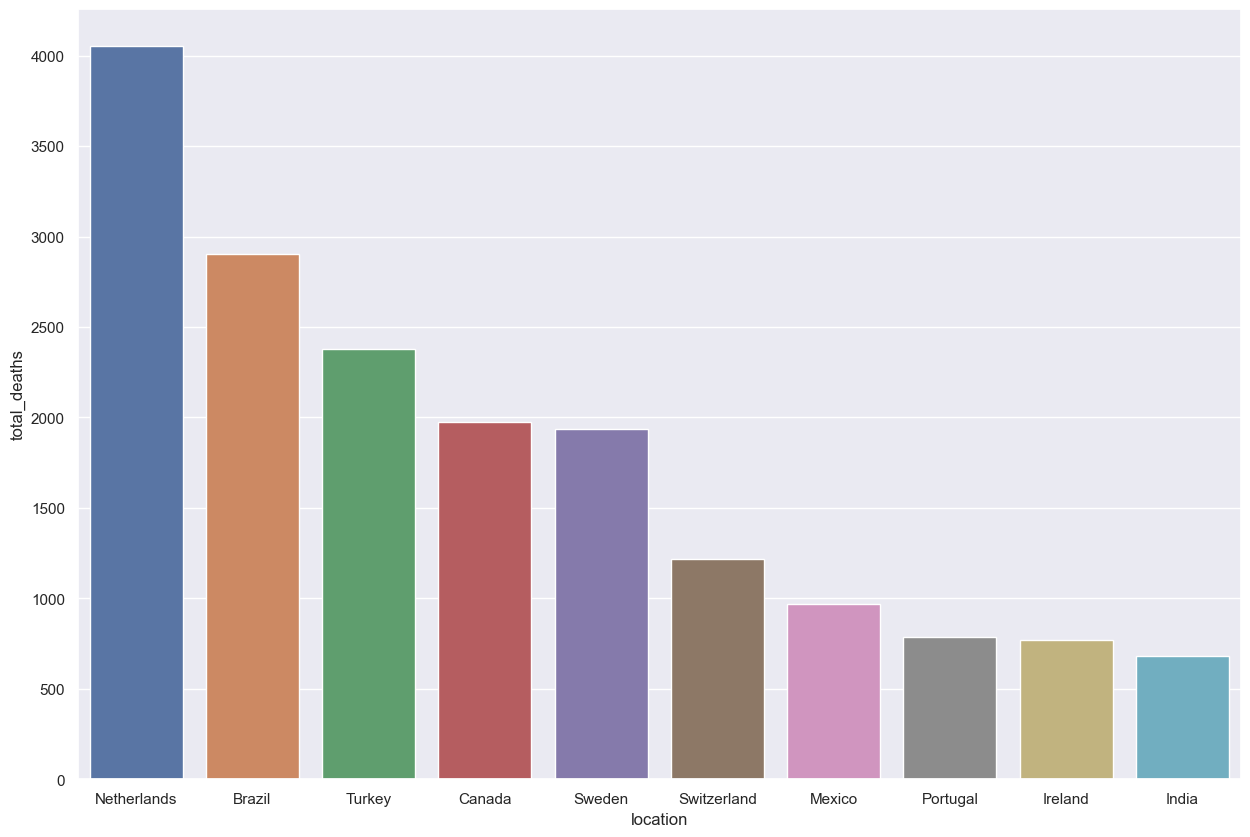

In [139]:
top_countries_by_deaths = max_deaths[10:20]
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x='location', y='total_deaths', data=top_countries_by_deaths, hue='location')
plt.show()

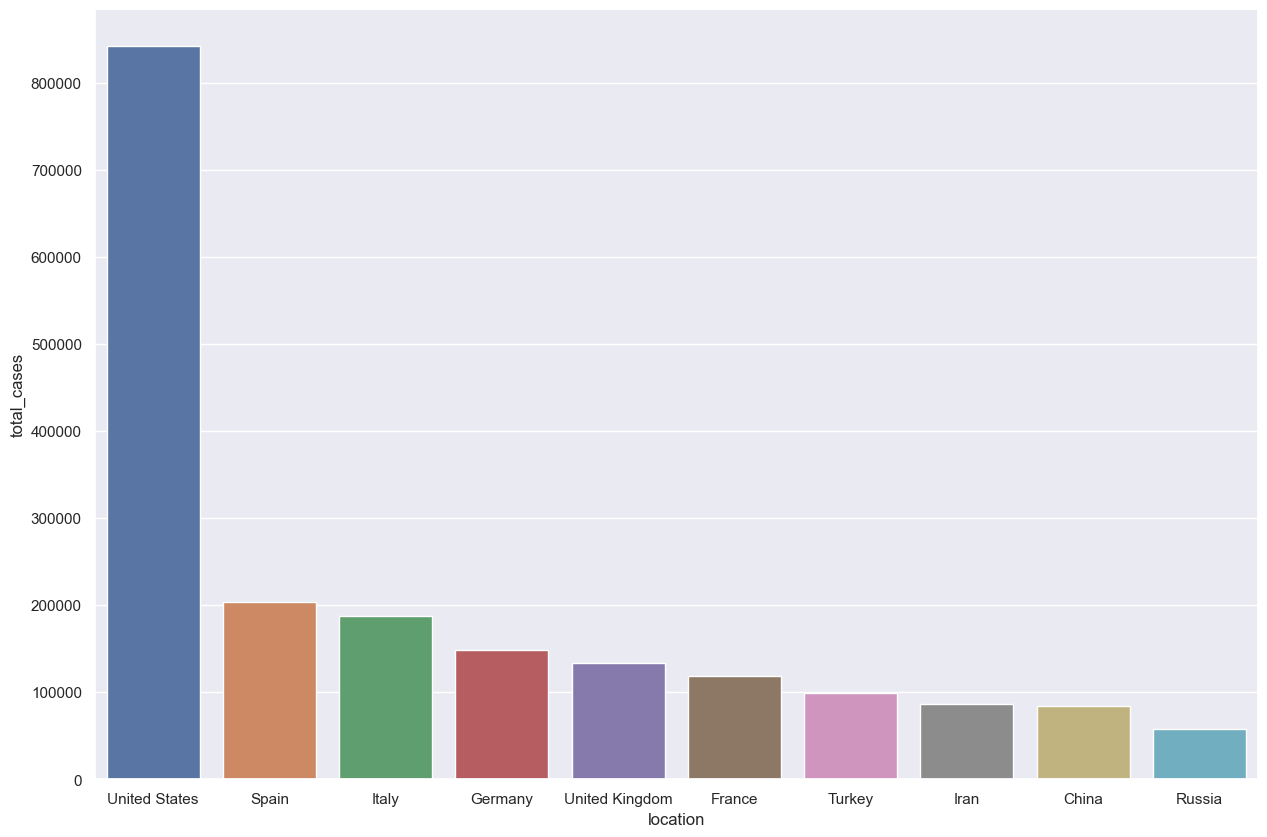

In [75]:
max_cases = random_date.sort_values(by='total_cases',ascending=False)
top_countries_by_cases = max_cases[1:11]
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x='location', y='total_cases', data=top_countries_by_cases, hue='location')
plt.show()

# Location wise Analysis

In [141]:
#United States
us = covid[covid.location == 'United States']
us.head()

,date,location,population,total_cases,total_deaths,stringency_index,median_age
18246,2019-12-31,United States,331002647.0,0,0,NaN,38.3
18247,2020-01-01,United States,331002647.0,0,0,0.0,38.3
18248,2020-01-02,United States,331002647.0,0,0,0.0,38.3
18249,2020-01-03,United States,331002647.0,0,0,0.0,38.3
18250,2020-01-04,United States,331002647.0,0,0,0.0,38.3


In [143]:
us.shape

(146, 7)

In [145]:
us.tail()

,date,location,population,total_cases,total_deaths,stringency_index,median_age
18387,2020-05-20,United States,331002647.0,1528568,91921,68.41,38.3
18388,2020-05-21,United States,331002647.0,1551853,93439,NaN,38.3
18389,2020-05-22,United States,331002647.0,1577287,94702,NaN,38.3
18390,2020-05-23,United States,331002647.0,1601434,96007,NaN,38.3
18391,2020-05-24,United States,331002647.0,1622670,97087,NaN,38.3


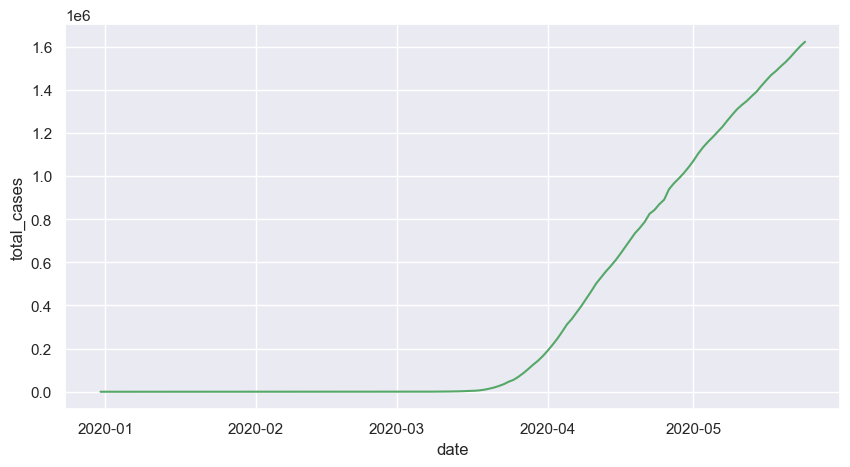

In [157]:
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(x='date',y='total_cases',data=us,color='g')
plt.show()

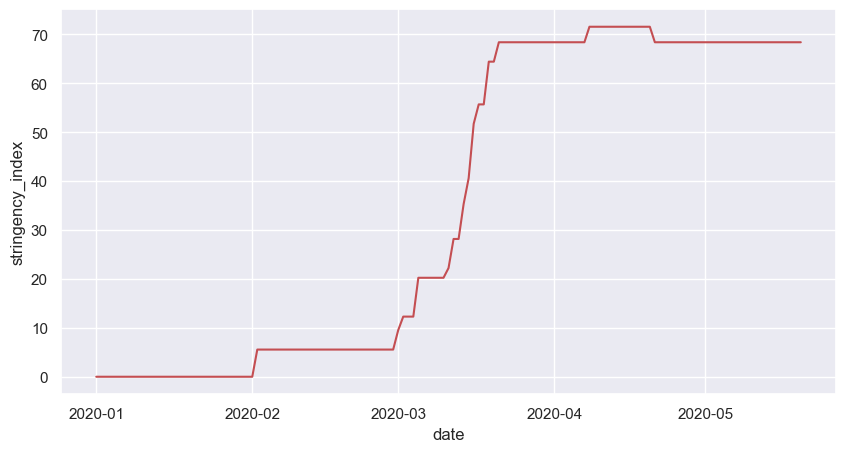

In [161]:
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(x='date',y='stringency_index',data=us,color='r')
plt.show()

In [163]:
#Pakistan
pak = covid[covid.location == 'Pakistan']
pak.head()

,date,location,population,total_cases,total_deaths,stringency_index,median_age
14182,2019-12-31,Pakistan,220892331.0,0,0,NaN,23.5
14183,2020-01-01,Pakistan,220892331.0,0,0,0.0,23.5
14184,2020-01-02,Pakistan,220892331.0,0,0,0.0,23.5
14185,2020-01-03,Pakistan,220892331.0,0,0,0.0,23.5
14186,2020-01-04,Pakistan,220892331.0,0,0,0.0,23.5


In [165]:
pak.tail()

,date,location,population,total_cases,total_deaths,stringency_index,median_age
14318,2020-05-20,Pakistan,220892331.0,45898,985,82.02,23.5
14319,2020-05-21,Pakistan,220892331.0,48091,1017,NaN,23.5
14320,2020-05-22,Pakistan,220892331.0,50694,1067,NaN,23.5
14321,2020-05-23,Pakistan,220892331.0,52437,1101,NaN,23.5
14322,2020-05-24,Pakistan,220892331.0,54601,1133,NaN,23.5


In [167]:
pak.shape

(141, 7)

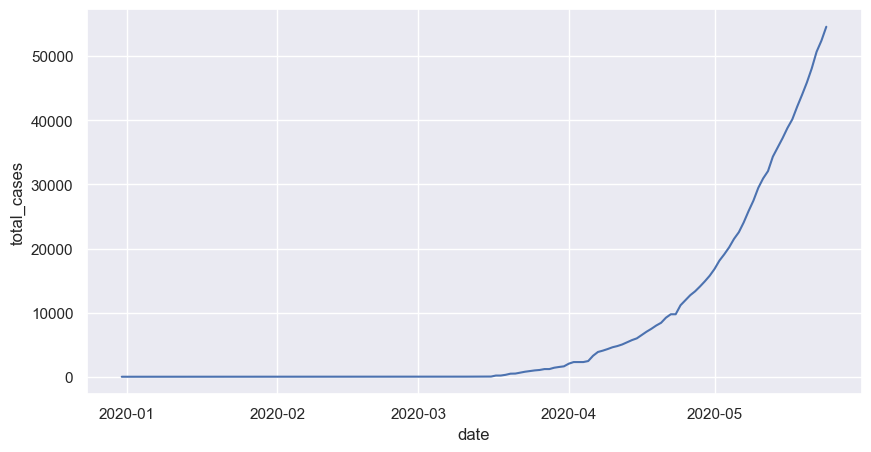

In [175]:
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(x='date',y='total_cases', data=pak, color='b')
plt.show()

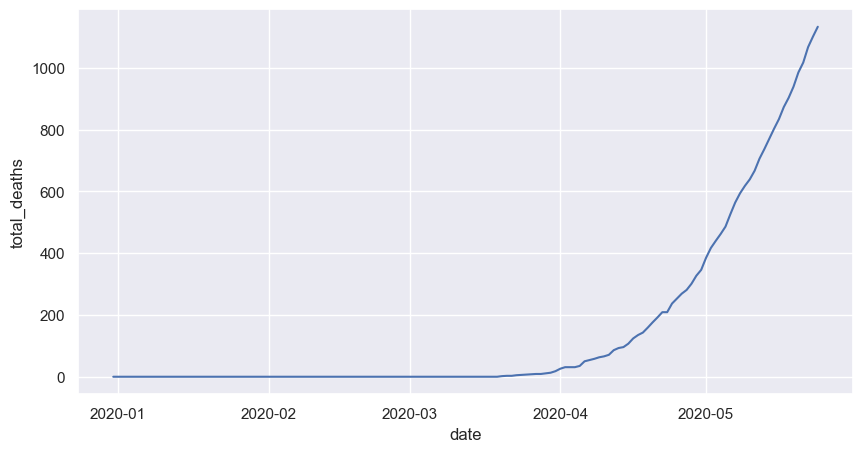

In [178]:
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(x='date',y='total_deaths', data=pak, color='b')
plt.show()

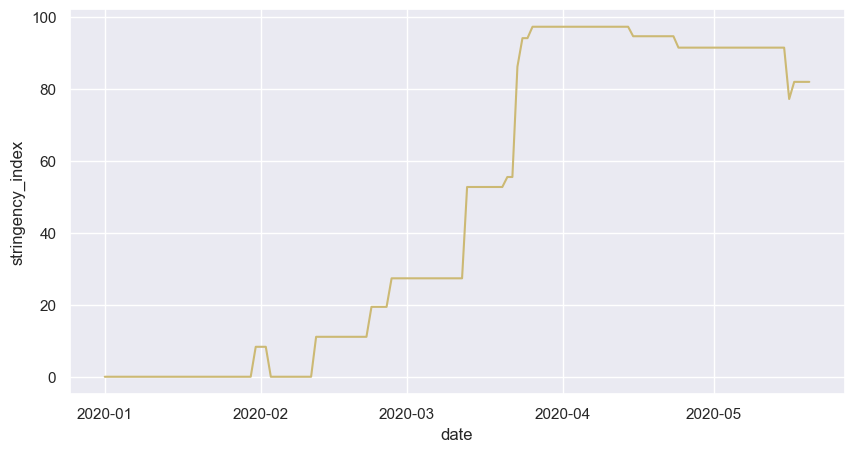

In [184]:
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(x='date',y='stringency_index', data=pak, color='y')
plt.show()